In [1]:
import pandas as pd

from tensorflow import keras
import matplotlib.pyplot as plt

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

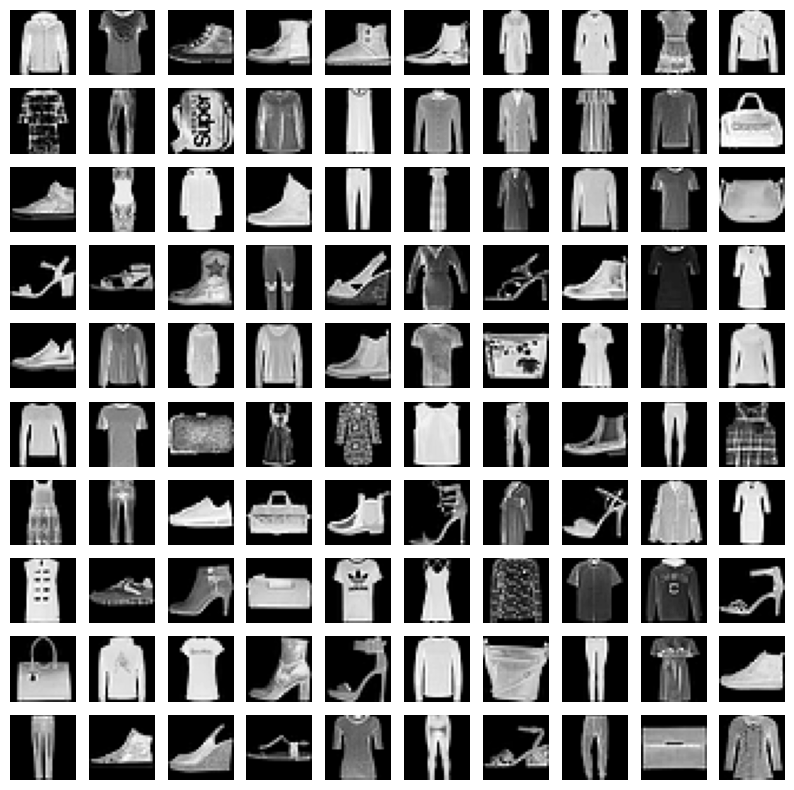

In [3]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.axis('off')

In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [6]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7091 - accuracy: 0.7695 - val_loss: 0.5048 - val_accuracy: 0.8310
Epoch 2/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4893 - accuracy: 0.8304 - val_loss: 0.4468 - val_accuracy: 0.8492
Epoch 3/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4452 - accuracy: 0.8443 - val_loss: 0.4370 - val_accuracy: 0.8450
Epoch 4/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4188 - accuracy: 0.8524 - val_loss: 0.4335 - val_accuracy: 0.8446
Epoch 5/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3982 - accuracy: 0.8609 - val_loss: 0.3820 - val_accuracy: 0.8670
Epoch 6/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3820 - accuracy: 0.8654 - val_loss: 0.3768 - val_accuracy: 0.8720
Epoch 7/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3676 - accuracy: 0.8697 - val_loss: 0.3769 - val_accuracy:

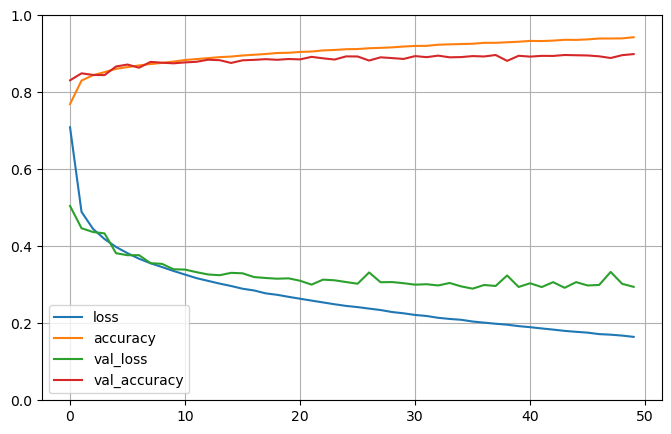

In [7]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [8]:
model.evaluate(X_test/255.0, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3236 - accuracy: 0.8902


[0.3235786259174347, 0.8902000188827515]